# Bike Sharing Assignment

In [1]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libararies

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Step 1 - Read and Understand the data

In [3]:
#reading the dataset


bike=pd.read_csv('day.csv')
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
#checking shape

bike.shape

(730, 16)

In [5]:
#getting the info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#describing the dataset

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#confiriming thr null values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Step-2 Data Cleaning

In [8]:
#removing 'instant' because it has only index values, 
#'dteday' it has dates which can be compensated by yr and month columns,
#'casual' and 'registered' they are only split of cnt column

In [9]:
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


In [10]:
#checking the shape to confirm dropping

bike.shape

(730, 12)

In [11]:
#correcting the spelling 

bike.rename({'yr':'year','mnth':'month','cnt':'count'},axis=1,inplace=True)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#mapping the numeric values into categorical string values in columns- season,mnth,weekday,workingday,weathersit

In [13]:
bike['season']=bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bike['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
bike['month']=bike['month'].map({1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

bike['month'].astype('category').value_counts()

August    62
Dec       62
Jan       62
July      62
March     62
May       62
Oct       62
April     60
June      60
Nov       60
Sept      60
Feb       56
Name: month, dtype: int64

In [15]:
bike['weekday']=bike['weekday'].map({0:'Sun',1:'Mon', 2:'Tues', 3:'Wed', 4:'Thurs',5:'Fri',6:'Sat'})

bike['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Fri      104
Sat      104
Sun      104
Thurs    104
Wed      104
Name: weekday, dtype: int64

In [16]:
bike['weathersit']=bike['weathersit'].map({1:'Clear', 2:'Mist', 3:'LightSnow', 4:'HeavyRain'})

bike['weathersit'].astype('category').value_counts()

Clear        463
Mist         246
LightSnow     21
Name: weathersit, dtype: int64

In [17]:
#checking the head again to confrim 

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
#checking the info of the dataset

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 3 - Data Visualisation

### Univariate Analysis

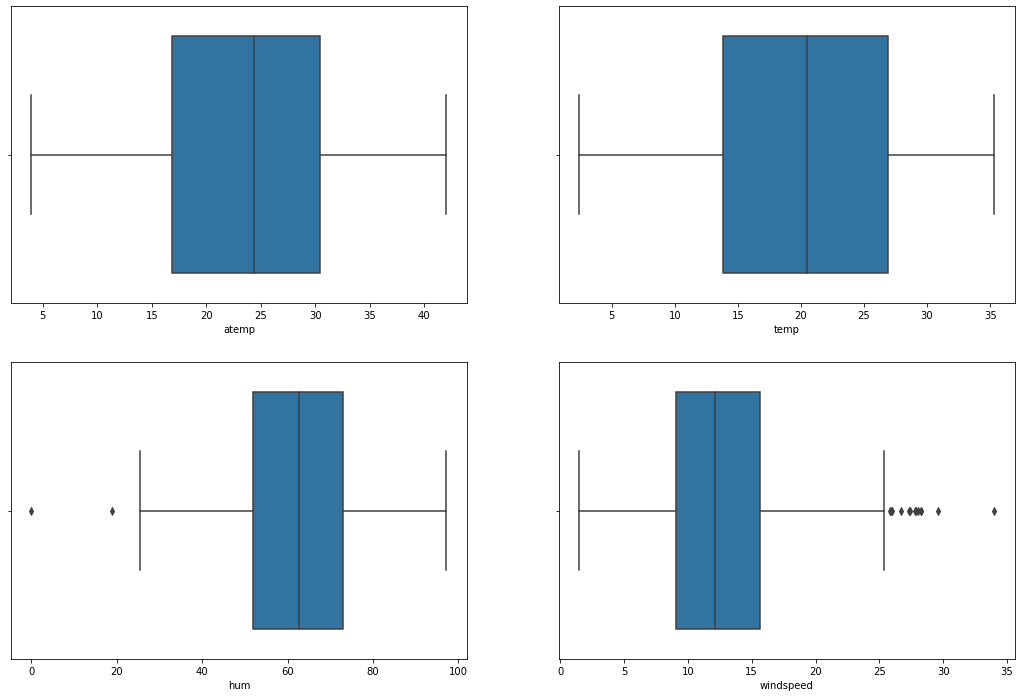

In [19]:
#checking for outliers for continuous variables

plt.figure(figsize=(18,12))
plt.subplot(2,2,2)
sns.boxplot('temp',data=bike)

plt.subplot(2,2,1)
sns.boxplot('atemp',data=bike)

plt.subplot(2,2,3)
sns.boxplot('hum', data=bike)

plt.subplot(2,2,4)
sns.boxplot('windspeed',data=bike)
plt.show()


 - There are no outliers present, only windspeed has little outliers.


### Bi-variate analysis

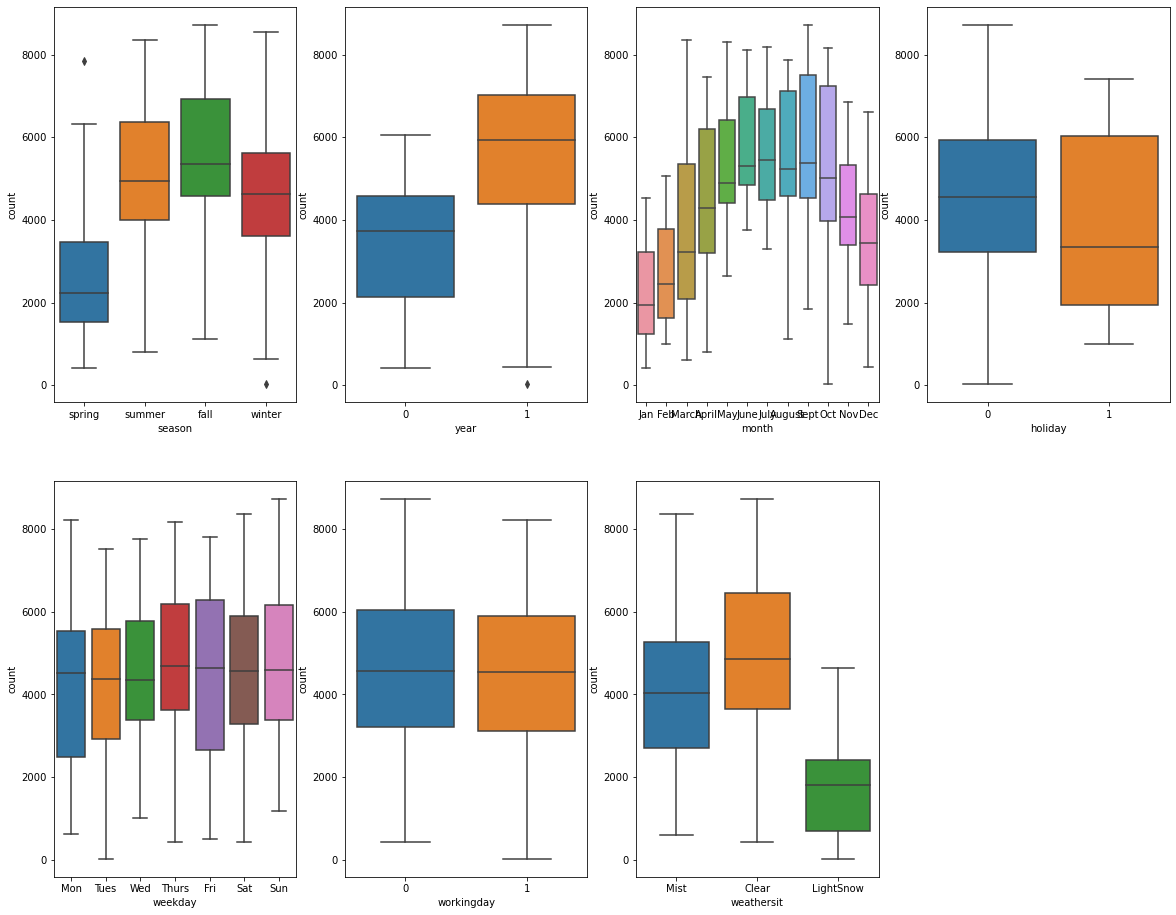

In [20]:
#analysing the categorical columns with the target variable count


plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(x= 'season', y= 'count',data=bike)

plt.subplot(2,4,2)
sns.boxplot(x= 'year', y= 'count',data=bike)

plt.subplot(2,4,3)
sns.boxplot(x= 'month', y= 'count',data=bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y= 'count',data=bike)

plt.subplot(2,4,5)
sns.boxplot(x= 'weekday', y= 'count',data=bike)

plt.subplot(2,4,6)
sns.boxplot(x= 'workingday', y= 'count',data=bike)

plt.subplot(2,4,7)
sns.boxplot(x= 'weathersit', y= 'count',data=bike)

plt.show()

 - Count is more in `2019` than in 2018.

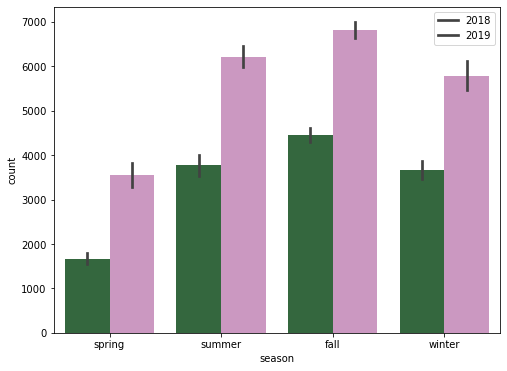

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'season', y= 'count',hue='year',data=bike,palette='cubehelix')
plt.legend(labels=['2018', '2019'])
plt.show()

 - `Fall season` has more no of bookings and its increasing from year 2018 to 2019.
 

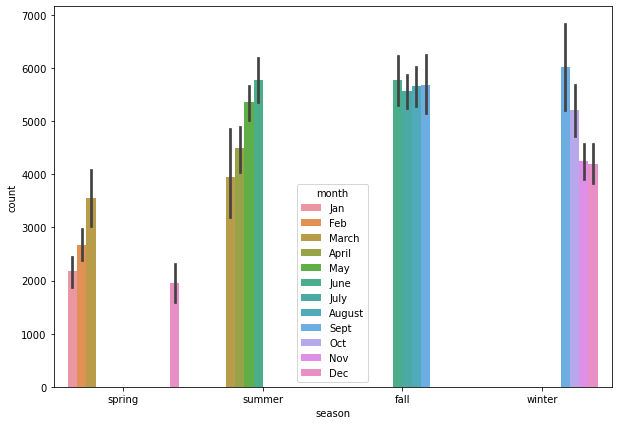

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(x= 'season', y= 'count',hue='month',data=bike)
plt.show()

 - and we see in reference to the month `(may,june,july,august,september)`the count is more than other months.

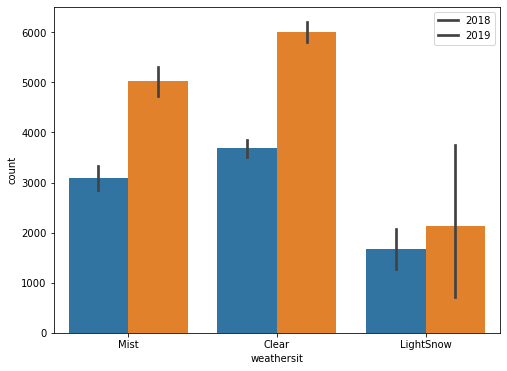

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'weathersit', y= 'count',hue='year',data=bike)
plt.legend(labels=['2018', '2019'])
plt.show()

 - When the weather is `clear`, booking count is increased which is obvious. 

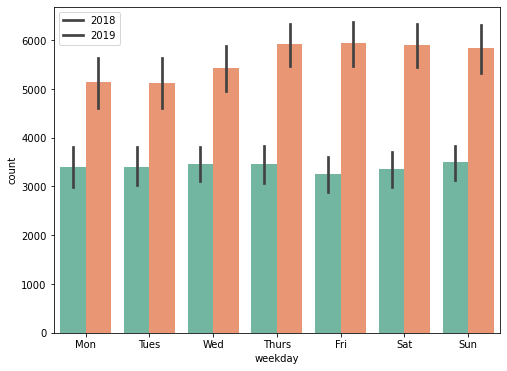

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'weekday', y= 'count',hue='year',data=bike,palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.show()

 - `Thursday`,`friday`,`saturday` and `sunday` the count is almost same in the year of 2019 as compare to other days and in the year 2018.
 

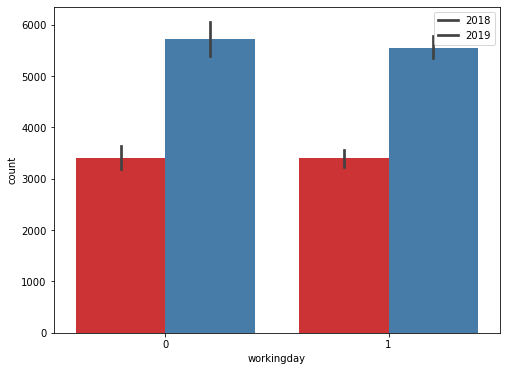

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'workingday', y= 'count',hue='year',data=bike,palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

- There is slight difference in Workingday and non-working , though `working` day is more than non-workingday

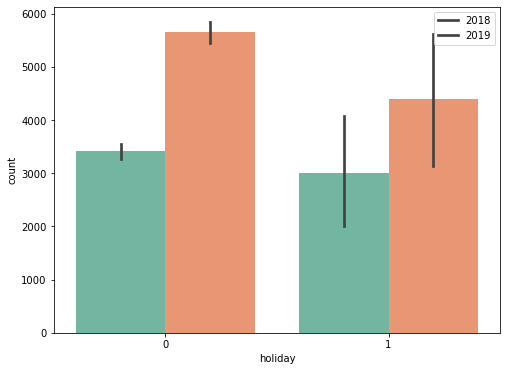

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'holiday', y= 'count',hue='year',data=bike,palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.show()

 - on `holiday` and on `weekend` , more customers go for bike bookings.

In [27]:
#analysing the numerical columns


<Figure size 432x360 with 0 Axes>

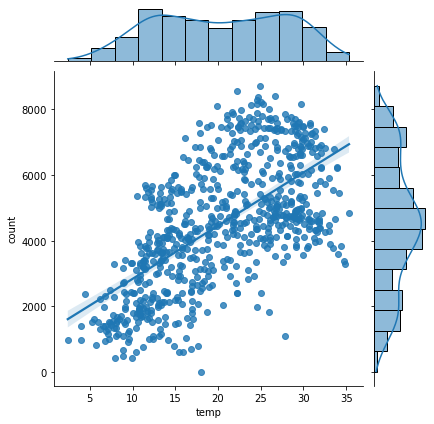

In [28]:
plt.figure(figsize=(6,5))

sns.jointplot(x= "temp", y='count', data=bike, kind="reg")
plt.show()

<Figure size 432x360 with 0 Axes>

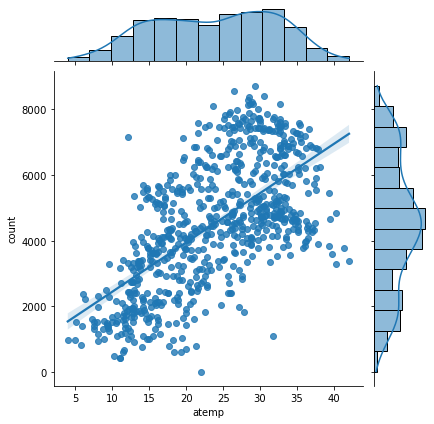

In [29]:
plt.figure(figsize=(6,5))

sns.jointplot(x= "atemp", y='count', data=bike, kind="reg")
plt.show()

<Figure size 432x360 with 0 Axes>

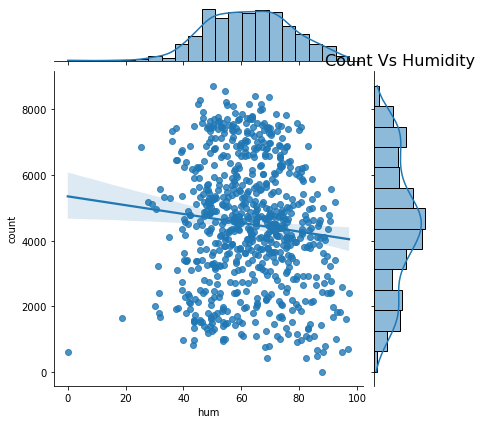

In [30]:
plt.figure(figsize=(6,5))
sns.jointplot(x= "hum", y='count', data=bike, kind="reg")
plt.title('Count Vs Humidity',fontsize=16)
plt.show()

<Figure size 432x360 with 0 Axes>

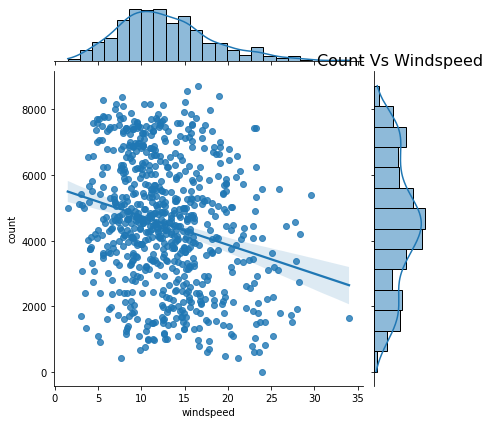

In [31]:
plt.figure(figsize=(6,5))
sns.jointplot(x= "windspeed", y='count', data=bike, kind="reg")
plt.title('Count Vs Windspeed',fontsize=16)
plt.show()


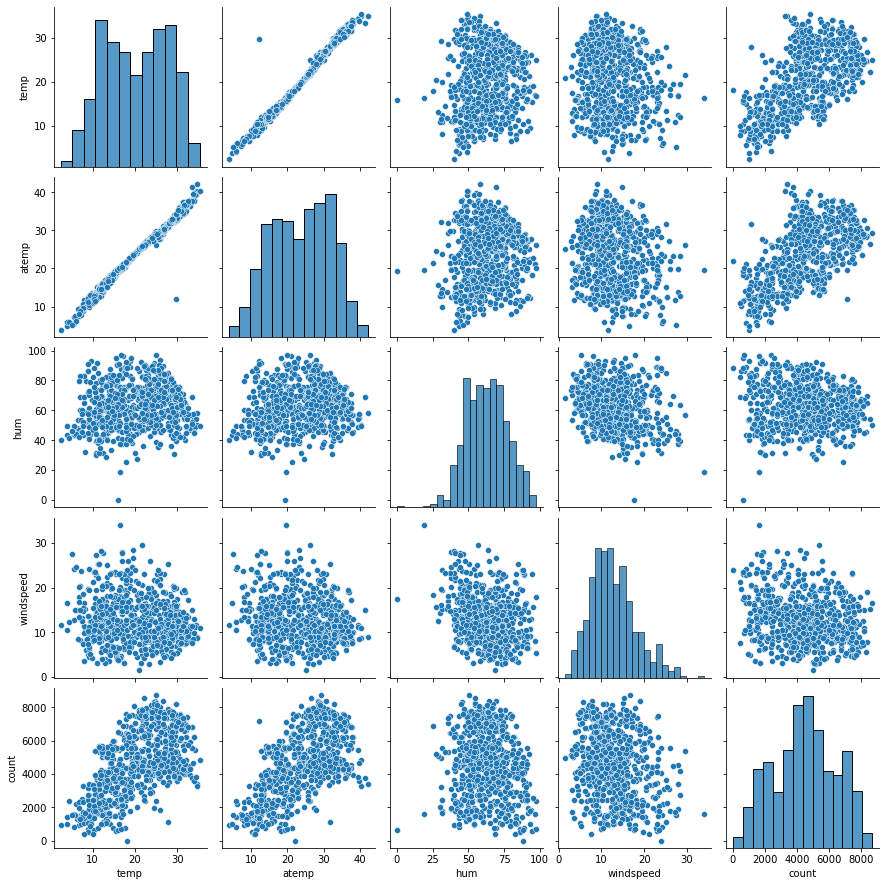

In [32]:
sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed','count'])
plt.show()

#### Inference:
 
 - As we can see from scatter plots of numerical variables, `temp`, `atemp` has positive linear relationship with `count`.

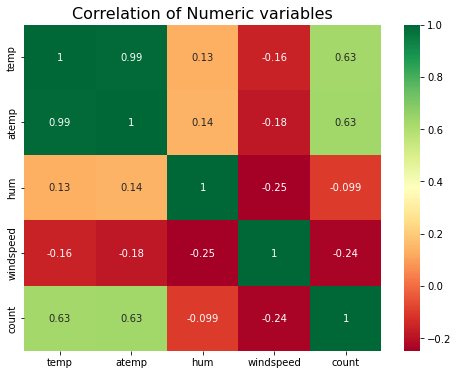

In [33]:
# we can check the correlation as well from the heatmap.

plt.figure(figsize=(8,6))
sns.heatmap(bike[['temp','atemp','hum','windspeed','count']].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation of Numeric variables',fontsize=16)
plt.show()


### Inference:
   - We can see from above heatmap that temp and atemp has high correlation of 0.99 which is almost 1. Meaning of both the variables is same.
    
   

# Step 4: Data Prepration

In [34]:
bike_cat=bike.select_dtypes(include=['object'])
bike_cat.head()

,season,month,weekday,weathersit
0,spring,Jan,Mon,Mist
1,spring,Jan,Tues,Mist
2,spring,Jan,Wed,Clear
3,spring,Jan,Thurs,Clear
4,spring,Jan,Fri,Clear


In [35]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


 ###  Dummification

In [36]:
bike_lr =pd.get_dummies(bike_cat,drop_first=True)
bike_lr.head()

,season_spring,season_summer,season_winter,month_August,month_Dec,month_Feb,month_Jan,month_July,month_June,month_March,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
bike=pd.concat([bike,bike_lr],axis=1)

In [38]:
bike.shape

(730, 34)

In [39]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                730 non-null    object 
 1   year                  730 non-null    int64  
 2   month                 730 non-null    object 
 3   holiday               730 non-null    int64  
 4   weekday               730 non-null    object 
 5   workingday            730 non-null    int64  
 6   weathersit            730 non-null    object 
 7   temp                  730 non-null    float64
 8   atemp                 730 non-null    float64
 9   hum                   730 non-null    float64
 10  windspeed             730 non-null    float64
 11  count                 730 non-null    int64  
 12  season_spring         730 non-null    uint8  
 13  season_summer         730 non-null    uint8  
 14  season_winter         730 non-null    uint8  
 15  month_August          7

In [40]:
#dropping original columns as we have alraedy created dummies

bike=bike.drop(['season','month','weekday','weathersit'],axis=1)
bike.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
bike.shape

(730, 30)

## Step 5: Train-Test Split and Feature Scaling

In [42]:
#splitting the dataset into test-train'

np.random.seed(0)

df_train,df_test=train_test_split(bike,train_size=0.7,random_state=100)

In [43]:
df_train.shape

(510, 30)

In [44]:
df_test.shape

(220, 30)

In [45]:
df_train.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_Mist
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,0,1


In [46]:
# apply scaler to all the variables except dummy variables 

scaler= MinMaxScaler()

num_vars = ['temp','atemp','hum','windspeed','count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [47]:
#decribing to check min and max values it should be (0,1 resp.)

df_train.describe()

,year,holiday,workingday,temp,atemp,hum,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


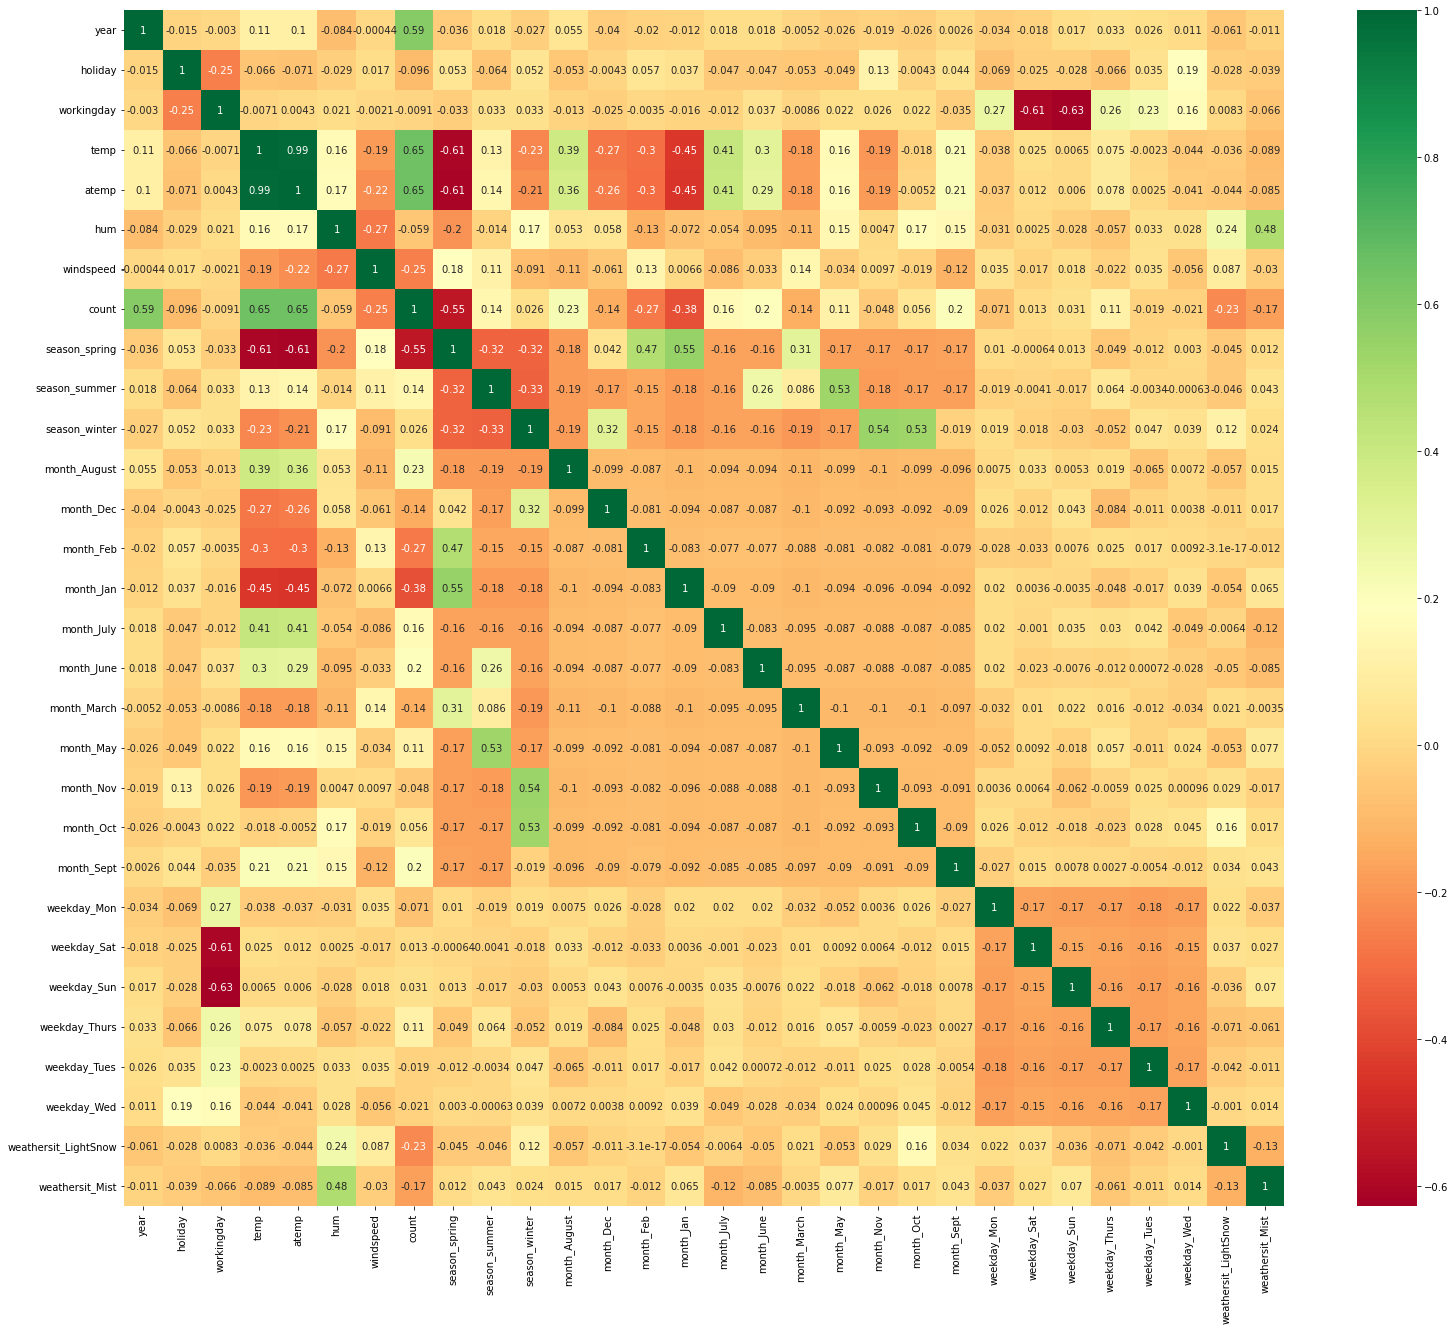

In [48]:
#checking the correlation coeeficients

plt.figure(figsize=(26,22))
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn')
plt.show()

#### Inference:

- count has positive correlation with `year`,`temp` and `atemp`.
 - `Mist` and `humidity` shows a realtion.
 - In `season_winter`,` month_nov` and `oct` shows a realtionship.
 - In `season_summer`, `month-may` shows a realtion.
 - In `season_spring`, `month-feb`,`month-jan` shows a realtion.

 

# Step 6: Model Building

In [49]:
X_train=df_train
y_train=df_train.pop('count')

### Recursive Feature Elimination (RFE)

In [50]:
X_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_August',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_Nov', 'month_Oct', 'month_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'weathersit_LightSnow',
       'weathersit_Mist'],
      dtype='object')

In [51]:
len(X_train.columns)

29

In [52]:
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,n_features_to_select=10)
rfe=rfe.fit(X_train,y_train)

In [53]:
X_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_August',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_Nov', 'month_Oct', 'month_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'weathersit_LightSnow',
       'weathersit_Mist'],
      dtype='object')

In [54]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False])

In [55]:
X_train.loc[:,rfe.support_].columns

Index(['year', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'month_July', 'month_Sept', 'weathersit_LightSnow'],
      dtype='object')

In [56]:
rfe.ranking_

array([ 1,  1,  9,  1,  8,  1,  1,  2,  1,  1, 15,  6,  7,  4,  1, 17, 20,
       14,  5, 18,  1, 13, 10, 11, 19, 12, 16,  1,  3])

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_August', False, 15),
 ('month_Dec', False, 6),
 ('month_Feb', False, 7),
 ('month_Jan', False, 4),
 ('month_July', True, 1),
 ('month_June', False, 17),
 ('month_March', False, 20),
 ('month_May', False, 14),
 ('month_Nov', False, 5),
 ('month_Oct', False, 18),
 ('month_Sept', True, 1),
 ('weekday_Mon', False, 13),
 ('weekday_Sat', False, 10),
 ('weekday_Sun', False, 11),
 ('weekday_Thurs', False, 19),
 ('weekday_Tues', False, 12),
 ('weekday_Wed', False, 16),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', False, 3)]

In [58]:
#columns got selected in RFE
cols=X_train.columns[rfe.support_]
cols

Index(['year', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'month_July', 'month_Sept', 'weathersit_LightSnow'],
      dtype='object')

In [59]:
len(cols)

10

In [60]:
#columns which got rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_spring', 'month_August', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_June', 'month_March', 'month_May',
       'month_Nov', 'month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'weathersit_Mist'],
      dtype='object')

In [61]:
X_train_rfe = X_train[cols]
X_train_rfe.head()

,year,holiday,temp,hum,windspeed,season_summer,season_winter,month_July,month_Sept,weathersit_LightSnow
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0


In [62]:
X_train_rfe.shape

(510, 10)

In [63]:
#Variance Inflation Factor

def checkVIF(bike):
    vif = pd.DataFrame()
    vif['Features'] = bike.columns
    vif['VIF'] = [variance_inflation_factor(bike.values, i) for i in range(bike.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model 1

In [64]:

X_train_sm=sm.add_constant(X_train_rfe)   #adding constant because its take the intercept from the origin by default.
lr=sm.OLS(y_train,X_train_sm)         
lr_model_1=lr.fit()                       #fitting the model for the prediction


In [65]:
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.79e-186
Time:                        16:16:32   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2682      0.026     10.292      0.000       0.217       0.319
year                     0.2259      0.008     27.118      0.000       0.210       0.242
holiday                 -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp                     0.6200      0.023     27.492      0.000       0.576       0.664
hum                     -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed               -0.2059      0.026     -7.889      0.000      -0.257      -0.155
season_summer            0.0800      0.011      7.281      0.000       0.058       0.102
season_winter            0.1390      0.011     12.903      0.000       0.118       0.160
month_July              -0.0482      0.018     -2.606      0.009      -0.085      -0.012
month_Sept               0.0944      0.016      5.724      0.000       0.062       0.127
weathersit_LightSnow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
checkVIF(X_train_rfe)

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,year,2.02
5,season_summer,1.76
6,season_winter,1.68
7,month_July,1.55
8,month_Sept,1.29
9,weathersit_LightSnow,1.09
1,holiday,1.04


 - `hum` shows the high VIF , so dropping humidity. 

In [67]:
#dropping `humidity` because of high VIF

X_train_new=X_train_rfe.drop(['hum'],axis=1)

In [68]:
checkVIF(X_train_new)

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,year,2.00
4,season_summer,1.75
6,month_July,1.51
5,season_winter,1.43
7,month_Sept,1.28
8,weathersit_LightSnow,1.06
1,holiday,1.03


### MODEL 2

In [69]:
X_train_sm=sm.add_constant(X_train_new)   
lr=sm.OLS(y_train,X_train_sm)         
lr_model_2=lr.fit()                
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          4.42e-171
Time:                        16:16:32   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0840      0.018      4.794      0.000       0.050       0.118
year                     0.2329      0.009     26.061      0.000       0.215       0.251
holiday                 -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp                     0.5854      0.024     24.438      0.000       0.538       0.632
windspeed               -0.1459      0.027     -5.365      0.000      -0.199      -0.092
season_summer            0.0750      0.012      6.346      0.000       0.052       0.098
season_winter            0.1228      0.011     10.731      0.000       0.100       0.145
month_July              -0.0313      0.020     -1.578      0.115      -0.070       0.008
month_Sept               0.0822      0.018      4.640      0.000       0.047       0.117
weathersit_LightSnow    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
checkVIF(X_train_new)

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,year,2.00
4,season_summer,1.75
6,month_July,1.51
5,season_winter,1.43
7,month_Sept,1.28
8,weathersit_LightSnow,1.06
1,holiday,1.03


In [71]:
#dropping `month_July` beacuse of the p-value

X_train_new=X_train_new.drop(['month_July'],axis=1)

### Model 3

In [72]:
X_train_sm=sm.add_constant(X_train_new)   
lr=sm.OLS(y_train,X_train_sm)         
lr_model_3=lr.fit()                 
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          9.22e-172
Time:                        16:16:32   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0875      0.017      5.029      0.000       0.053       0.122
year                     0.2334      0.009     26.093      0.000       0.216       0.251
holiday                 -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp                     0.5682      0.021     26.580      0.000       0.526       0.610
windspeed               -0.1455      0.027     -5.340      0.000      -0.199      -0.092
season_summer            0.0812      0.011      7.256      0.000       0.059       0.103
season_winter            0.1261      0.011     11.179      0.000       0.104       0.148
month_Sept               0.0895      0.017      5.229      0.000       0.056       0.123
weathersit_LightSnow    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
checkVIF(X_train_new)

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,year,2.00
4,season_summer,1.55
5,season_winter,1.34
6,month_Sept,1.20
7,weathersit_LightSnow,1.06
1,holiday,1.03


In [74]:
#dropping `windspeed` beacuse of the VIF, although it is in the range only.

X_train_new=X_train_new.drop(['windspeed'],axis=1)

In [75]:
X_train_sm=sm.add_constant(X_train_new)   
lr=sm.OLS(y_train,X_train_sm)         
lr_model_4=lr.fit()                 
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     274.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.41e-167
Time:                        16:16:32   Log-Likelihood:                 440.09
No. Observations:                 510   AIC:                            -864.2
Df Residuals:                     502   BIC:                            -830.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0286      0.014      2.069      0.039       0.001       0.056
year                     0.2322      0.009     25.285      0.000       0.214       0.250
holiday                 -0.0901      0.029     -3.098      0.002      -0.147      -0.033
temp                     0.5913      0.022     27.496      0.000       0.549       0.634
season_summer            0.0760      0.011      6.641      0.000       0.054       0.098
season_winter            0.1332      0.012     11.578      0.000       0.111       0.156
month_Sept               0.0958      0.018      5.465      0.000       0.061       0.130
weathersit_LightSnow    -0.2684      0.027     -9.854      0.000      -0.322      -0.215
==============================================================================
Omnibus:                       65.487   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.335
Skew:                          -0.785   Prob(JB):                     1.49e-25
Kurtosis:                       4.707   Cond. No.                         8.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference:

- we can consider `lr_model_4` to be the final model as it has low multicolinearity between the predictors and the p-values of all the variables seems to be significant. 
- VIF also in the range of 5.

## Step 7: Residual Anlaysis on the train dataset

In [76]:

y_train_pred = lr_model_4.predict(X_train_sm)

In [77]:
#residual analysis

Res=y_train-y_train_pred
Res

576    0.084836
426   -0.057161
728   -0.201671
482   -0.087811
111   -0.117971
         ...   
578    0.061158
53     0.069617
350    0.004059
79    -0.141723
520    0.111192
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

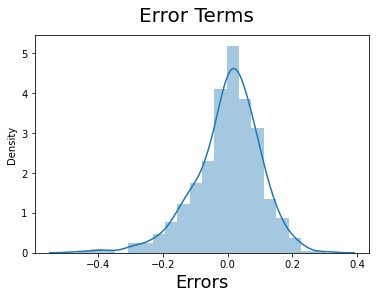

In [78]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((Res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

- Errors seems to be normally distributed.

### Multicolinearity

In [79]:
checkVIF(X_train_new)

,Features,VIF
2,temp,2.71
0,year,1.93
3,season_summer,1.49
4,season_winter,1.30
5,month_Sept,1.19
6,weathersit_LightSnow,1.05
1,holiday,1.03


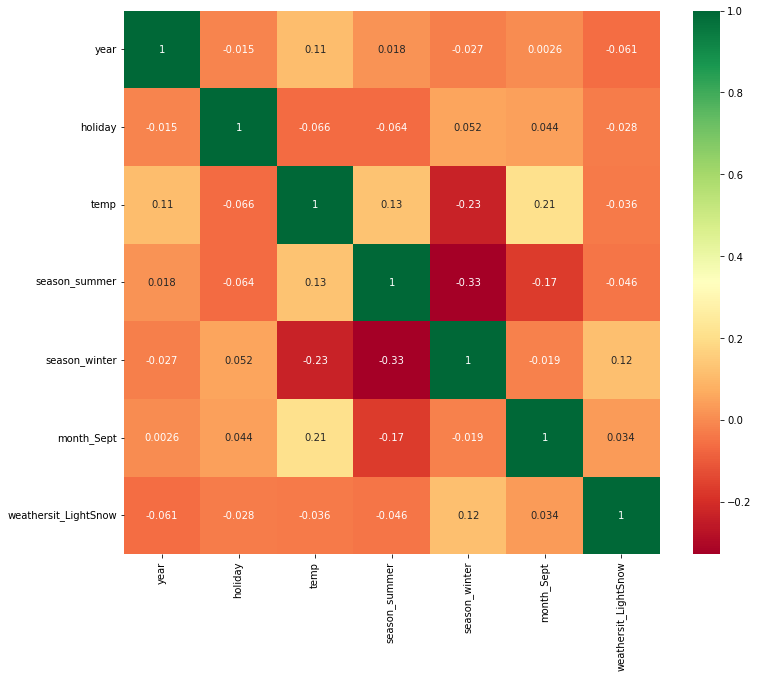

In [80]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

- There is no Multicolinearity seen from heatmap also VIF values are less than 5. 

## Step 8:   Prediction and Evaluation

In [81]:
# scaling the test set

num_vars = ['temp', 'atemp', 'hum', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [82]:
df_test.describe()

,year,holiday,workingday,temp,atemp,hum,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
df_test.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'count', 'season_spring', 'season_summer', 'season_winter',
       'month_August', 'month_Dec', 'month_Feb', 'month_Jan', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'weathersit_LightSnow',
       'weathersit_Mist'],
      dtype='object')

In [84]:
#Dividing into X and y

y_test = df_test.pop('count')
X_test = df_test

In [85]:

# Now let's use our model to make predictions.

X_test_new = X_test[X_train_new.columns]


In [86]:
# Adding constant variable to test dataframe

X_test_new = sm.add_constant(X_test_new)


In [87]:
# Making predictions

y_pred = lr_model_4.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [88]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.7773965041467383

Text(0, 0.5, 'y_pred')

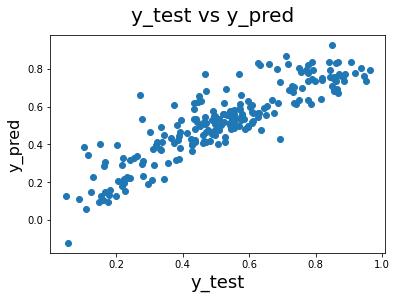

In [89]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

- from the above scatter plot we can predict that error terms are linearly distributed, which shows the homoscedasticity and also shows the linear relation between y_test and y_pred.

In [90]:
round(lr_model_4.params,4)

const                   0.0286
year                    0.2322
holiday                -0.0901
temp                    0.5913
season_summer           0.0760
season_winter           0.1332
month_Sept              0.0958
weathersit_LightSnow   -0.2684
dtype: float64

 - The equation of best fit line becomes:


count=0.0286+(0.2322*year)-(0.0901*holiday)+(0.5913*temp)+(0.0760*season_summer)+(0.1332*season_winter)+ (0.0958*season_summer)-(0.2684*weathersit_LightSnow)

Text(0, 0.5, 'y_pred')

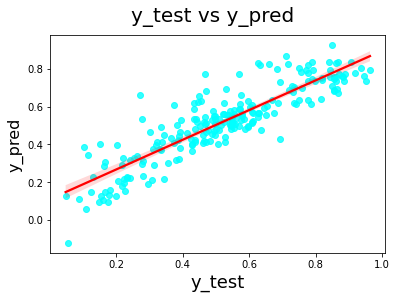

In [91]:
#plotting a regression plot to see the trend.


fig = plt.figure()
sns.regplot(y_test,y_pred,fit_reg=True,scatter_kws={'color':'cyan'},line_kws={'color':'red'})
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

- If we see the comparison of the training and the test dataset.


R2 of train set= 79.3


R2 of test set = 77.7

- So, we can see from the model that demand of bikes depends upon :- year, holiday, temp, summer, winter, september month, Light_snow.

In [94]:
import jovian

In [96]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jyotisodhi786/bike-sharing-assignment" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/jyotisodhi786/bike-sharing-assignment


'https://jovian.ai/jyotisodhi786/bike-sharing-assignment'